<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Обучение-моделей-без-учёта-дисбаланса" data-toc-modified-id="Обучение-моделей-без-учёта-дисбаланса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей без учёта дисбаланса</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# ТЕЛЕКОМ

<div style="border:solid lightblue 3px; padding: 20px">
    
Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

**Описание данных**

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## Загрузка данных

In [1]:
# в случае конфликта библиотек раскомментировать и запустить первую ячейку с кодом
#!pip install -U your_library

In [2]:
# импортируем все необходимые библиотеки и настройки pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max.columns', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# читаем данные из файлов
try: # пытаемся выполнить код ниже, загрузиться локально
    contract = pd.read_csv('c:\\final_project\contract.csv')
    internet = pd.read_csv('c:\\final_project\internet.csv')
    personal = pd.read_csv('c:\\final_project\personal.csv')
    phone    = pd.read_csv('c:\\final_project\phone.csv')
except: # если не получилось выполнить код выше, была ошибка, вероятно, работаем на платформе, выполняем код ниже
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone    = pd.read_csv('/datasets/final_provider/phone.csv')

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Ниже просматриваем общую информацию, и выводим первые 5 строк таблиц. </div>

In [4]:
contract.info()

contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: float64(1), object(7)
memory usage: 247.7+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
internet.info()

internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 172.5+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
personal.info()

personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 165.1+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
phone.info()

phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 49.8+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


### Вывод
<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Перед нами представлено 4 таблицы с данными: 

- `contract.csv` — информация о договоре;
- `internet.csv` — информация об интернет-услугах;
- `personal.csv` — персональные данные клиента;
- `phone.csv` — информация об услугах телефонии.
    
Во всех файлах столбец `customerID` содержит код клиента. По этому столбцу ниже будем объединять данные, и в последствие его удалим, чтобы он не создавал помехи для работы наших будущих моделей. Во всех файлах с данными отсутствуют пропуски. В таблице `contract.csv` с информацией о договоре присутствуют два столбца с датами. Ниже нам надо будет эти данные привести в соотвтествие с типом данных, и попытаться найти некоторую возможную дополнительную информацию для нашего клиента. И в этой же таблице столбец с данными `TotalCharges` привести в тип `float`. Также другие столбцы в этой таблице и в остальных, в которых по сути булевые значения (`Yes` или `No`) привести их в соответствие с их типом.

</div>

## Подготовка данных

In [8]:
# переименовываем столбцы в наших таблицах
contract = contract.rename(columns = {'customerID': 'customer_id',
                                      'BeginDate': 'begin_date',
                                      'EndDate': 'end_date',
                                      'Type': 'type',
                                      'PaperlessBilling': 'paperless_billing',
                                      'PaymentMethod': 'payment_method',
                                      'MonthlyCharges': 'monthly_charges',
                                      'TotalCharges': 'total_charges'}
                          )

internet = internet.rename(columns = {'customerID': 'customer_id',
                                      'InternetService': 'internet_service',
                                      'OnlineSecurity': 'online_security',
                                      'OnlineBackup':  'online_backup',
                                      'DeviceProtection':  'device_protection',
                                      'TechSupport': 'tech_support',
                                      'StreamingTV': 'streaming_tv',
                                      'StreamingMovies': 'streaming_movies'}
                          )

personal = personal.rename(columns = {'customerID': 'customer_id',
                                      'SeniorCitizen': 'senior_citizen',
                                      'Partner': 'partner',
                                      'Dependents': 'dependents'}
                          )

phone = phone.rename(columns = {'customerID': 'customer_id',
                                'MultipleLines': 'multiple_lines'}
                    )

In [9]:
# приводим столбцы в соответствие с их типом данных
contract['begin_date'] = pd.to_datetime(contract['begin_date'], format = '%Y.%m.%d')

In [10]:
# заменяем значения пробелов на ноль
contract['total_charges'] = contract['total_charges'].replace(' ', '0')

contract['total_charges'] = contract['total_charges'].astype('float')

In [11]:
# функция для одной строки, которая создаст нам целевые признаки для нашей модели
def end_date(row):
    end_date = row['end_date']
    
    if end_date == 'No':
        return '0'
    
    else:
        return '1'

# создаём новый столбец с целевыми признаками
contract['closed_contract'] = contract.apply(end_date, axis=1)

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid">

Ниже проведём вычисления срока жизни клиента, и добавим результат в отдельный столбец таблицы  `contract`.

</div>

In [12]:
# заменяем значения No на дату выгрузки данных
contract['end_date'] = contract['end_date'].replace('No', '2020-02-01 00:00:00')

# заменяем тип данных в столбце
contract['end_date'] = pd.to_datetime(contract['end_date'], format='%Y-%m-%d %H:%M:%S')

# вычисляем срок жизни клиента, и создаём соответствующий столбец признаков
contract['customer_lifetime'] = contract['end_date'] - contract['begin_date']

# заменяем тип данных на целочисленный, и переводим срок жизни клиентов в месяцы
contract['customer_lifetime'] = (contract['customer_lifetime'] / np.timedelta64(1, 'M')).astype(int)

In [13]:
# проверяем общую инофрмацию итоговой таблицы 'contract'
contract.info()

# выводим на экран первые 5 строк
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
customer_id          7043 non-null object
begin_date           7043 non-null datetime64[ns]
end_date             7043 non-null datetime64[ns]
type                 7043 non-null object
paperless_billing    7043 non-null object
payment_method       7043 non-null object
monthly_charges      7043 non-null float64
total_charges        7043 non-null float64
closed_contract      7043 non-null object
customer_lifetime    7043 non-null int32
dtypes: datetime64[ns](2), float64(2), int32(1), object(5)
memory usage: 385.2+ KB


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,closed_contract,customer_lifetime
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,"1,889.50",0,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,"1,840.75",0,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,2


<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Объединяем ниже все наши таблцы в одну. </div>

In [14]:
# создаём константные столбцы для таблиц
internet['internet_user'] = 'Yes'

phone['phone_user'] = 'Yes'

In [15]:
# объединяем таблицы
telekom = contract.merge(internet, on='customer_id', how='left')

# проверяем размер объединённой таблицы
telekom.shape

(7043, 18)

In [16]:
# продолжаем присоединять следующую таблицу
telekom = telekom.merge(personal, on='customer_id', how='left')

# контроль размера объединённой таблицы
telekom.shape

(7043, 22)

In [17]:
# добавляем последнюю таблцу в общую
telekom = telekom.merge(phone, on='customer_id', how='left')

# контроль размера объединённой таблицы
telekom.shape

(7043, 24)

In [18]:
# смотрим общую информацию объединённой таблицы
telekom.info()

# смотрим на первые строки
telekom.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
customer_id          7043 non-null object
begin_date           7043 non-null datetime64[ns]
end_date             7043 non-null datetime64[ns]
type                 7043 non-null object
paperless_billing    7043 non-null object
payment_method       7043 non-null object
monthly_charges      7043 non-null float64
total_charges        7043 non-null float64
closed_contract      7043 non-null object
customer_lifetime    7043 non-null int32
internet_service     5517 non-null object
online_security      5517 non-null object
online_backup        5517 non-null object
device_protection    5517 non-null object
tech_support         5517 non-null object
streaming_tv         5517 non-null object
streaming_movies     5517 non-null object
internet_user        5517 non-null object
gender               7043 non-null object
senior_citizen       7043 non-null int64
partner              7043 non-null ob

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,closed_contract,customer_lifetime,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_user,gender,senior_citizen,partner,dependents,multiple_lines,phone_user
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,DSL,No,Yes,No,No,No,No,Yes,Female,0,Yes,No,NaN,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,"1,889.50",0,34,DSL,Yes,No,Yes,No,No,No,Yes,Male,0,No,No,No,Yes
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,2,DSL,Yes,Yes,No,No,No,No,Yes,Male,0,No,No,No,Yes
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,"1,840.75",0,45,DSL,Yes,No,Yes,Yes,No,No,Yes,Male,0,No,No,NaN,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,2,Fiber optic,No,No,No,No,No,No,Yes,Female,0,No,No,No,Yes


In [19]:
# смотрим сколько у нашей объединённой таблицы пропусков
telekom.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
closed_contract         0
customer_lifetime       0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
internet_user        1526
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        682
phone_user            682
dtype: int64

In [20]:
# заполняем пропуски в наших группирующих столбцах
telekom[['internet_user', 'phone_user']] = telekom[['internet_user', 'phone_user']].fillna('No')

# заполняем остальные пропуски заглушкой
telekom = telekom.fillna('unknown')

# проверяем сколько осталось пропусков
telekom.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
closed_contract      0
customer_lifetime    0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
internet_user        0
gender               0
senior_citizen       0
partner              0
dependents           0
multiple_lines       0
phone_user           0
dtype: int64

In [21]:
# смотрим корреляцию
telekom.corr()

,monthly_charges,total_charges,customer_lifetime,senior_citizen
monthly_charges,1.00,0.65,0.25,0.22
total_charges,0.65,1.00,0.83,0.10
customer_lifetime,0.25,0.83,1.00,0.02
senior_citizen,0.22,0.10,0.02,1.00


In [22]:
# удаляем лишние для наших будущих моделей столбцы
telekom_cut = telekom.drop(['customer_id',
                            'begin_date',
                            'end_date',
                            'total_charges'],
                           axis=1
                          )

In [23]:
# просматриваем общую информацию 
telekom_cut.info()

# и первые строчки итоговой таблицы, что будем подавать на обучение моделей
telekom_cut.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
type                 7043 non-null object
paperless_billing    7043 non-null object
payment_method       7043 non-null object
monthly_charges      7043 non-null float64
closed_contract      7043 non-null object
customer_lifetime    7043 non-null int32
internet_service     7043 non-null object
online_security      7043 non-null object
online_backup        7043 non-null object
device_protection    7043 non-null object
tech_support         7043 non-null object
streaming_tv         7043 non-null object
streaming_movies     7043 non-null object
internet_user        7043 non-null object
gender               7043 non-null object
senior_citizen       7043 non-null int64
partner              7043 non-null object
dependents           7043 non-null object
multiple_lines       7043 non-null object
phone_user           7043 non-null object
dtypes: float64(1), int32(1), int64(1), object(17)
mem

,type,paperless_billing,payment_method,monthly_charges,closed_contract,customer_lifetime,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_user,gender,senior_citizen,partner,dependents,multiple_lines,phone_user
0,Month-to-month,Yes,Electronic check,29.85,0,1,DSL,No,Yes,No,No,No,No,Yes,Female,0,Yes,No,unknown,No
1,One year,No,Mailed check,56.95,0,34,DSL,Yes,No,Yes,No,No,No,Yes,Male,0,No,No,No,Yes
2,Month-to-month,Yes,Mailed check,53.85,1,2,DSL,Yes,Yes,No,No,No,No,Yes,Male,0,No,No,No,Yes
3,One year,No,Bank transfer (automatic),42.30,0,45,DSL,Yes,No,Yes,Yes,No,No,Yes,Male,0,No,No,unknown,No
4,Month-to-month,Yes,Electronic check,70.70,1,2,Fiber optic,No,No,No,No,No,No,Yes,Female,0,No,No,No,Yes


## Исследование задачи

0   0.73
1   0.27
Name: closed_contract, dtype: float64


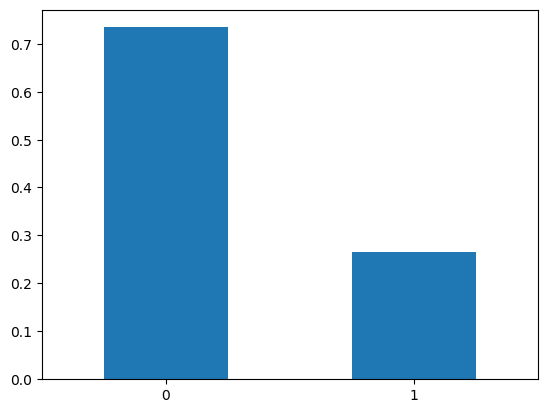

In [24]:
# проанализируем частоты классов целевого признака по умолчанию
class_frequency = telekom_cut['closed_contract'].value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar', rot=1)
plt.show()

**Вывод**

**Как мы можем видеть, что в данных наблюдается явный дисбаланс в сторону нулевых (отрицательных) целевых ответов. Т.е. клиенты остаются с нашим заказчиком в 73% случаев. Однако, 27% ушедших клинетов оператора связи это чувствительное число. Задача оператора связи и его маркетингового отдела их удержать. Наша же задача разработать модель, которая будет оценивать вероятность ухода клиентов.**

### Подготовка признаков

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Сначала перед одноразовым кодированием (OneHotEncoding) и масштабированием (Scaler) разделим наши данные на обучающую, и тестовую выборки. </div>

In [25]:
# фиксируем число рандома по дате начала выпускного проекта
RANDOM_STATE = 80822

In [26]:
# записываем в переменную категориальные признаки
features = telekom_cut.drop(['closed_contract'], axis=1)

# записываем в переменную целевые признаки
target = telekom_cut['closed_contract']

In [27]:
# разбиваем данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=RANDOM_STATE)

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Далее производим кодирование и масштабирование признаков. </div>

In [28]:
# заносим в переменную все количественные столбцы
numeric = ['customer_lifetime']

# заносим в переменную все категориальные столбцы
categoric = ['type','paperless_billing','payment_method',
             'internet_service','online_security',
             'online_backup','device_protection','tech_support',
             'streaming_tv','streaming_movies','internet_user',
             'gender','senior_citizen','partner',
             'dependents','multiple_lines','phone_user']

# заносим в переменные кодировщик и масштаб
scaler = StandardScaler()
drop_ohe = OneHotEncoder(drop='first', sparse=False)

# производим масштабирование количественных признаков
features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_test[numeric]  = scaler.transform(features_test[numeric])

# производим кодирование категориальных признаков и заносим их в переменные
features_train_categoric = drop_ohe.fit_transform(features_train[categoric])
features_test_categoric = drop_ohe.transform(features_test[categoric])

# объединяем масштабируемые количественные и закодированные категориальные переменные в массивы
processed_telekom_train = np.concatenate([features_train[numeric], features_train_categoric], axis=1)
processed_telekom_test = np.concatenate([features_test[numeric], features_test_categoric], axis=1)

### Обучение моделей без учёта дисбаланса

```python
# код который помог принять решение

# заносим в переменную модель классификатор дерева решений
DTC_model_default = DecisionTreeClassifier(random_state=RANDOM_STATE)

# отмечаем в переменной необходимые для нашей модели гиперпараметры
DTC_parametrs_search = {'max_depth': range (1,13, 2),
                        'min_samples_leaf': range (1,8),
                        'min_samples_split': range (2,10,2) }

# запускаем метод GridSearch для поиска оптимальных гиперпараметров
DTC_grid_default = GridSearchCV(DTC_model_default, DTC_parametrs_search, scoring='roc_auc', cv=5)

# запускаем обучение метода
DTC_grid_default.fit(processed_telekom_train, target_train)

# # # выводим результат метода с лучшими гиперпараметрами для нашей модели # # #
# # # DTC_grid_default.best_params_ # # # фиксируем лучшие гиперпараметры

# выводим лучший показатель модели
DTC_grid_default.best_score_
```

In [29]:
# заносим в переменную настроенную модель дерева решения
DTC_model_default = DecisionTreeClassifier(random_state=RANDOM_STATE,
                                           max_depth=5,
                                           min_samples_leaf=1,
                                           min_samples_split=2
                                          )

# обучаем модель на тренировочных данных
DTC_model_default.fit(processed_telekom_train,target_train)

cross_val_score(DTC_model_default,
                processed_telekom_train,
                target_train,
                scoring='roc_auc',
                cv=5
               ).mean()

0.834824005153045

```python
# код который помог принять решение

# заносим в переменную модель классификатор случайного леса
RFC_model_default = RandomForestClassifier(random_state=RANDOM_STATE)

# вносим в переменную необходимые нам гиперпараметры для нашей модели
RFC_parametrs = { 'n_estimators': range (30, 71, 10),
                 'max_depth': range (1,13, 2),
                 'min_samples_leaf': range (1,8),
                 'min_samples_split': range (2,10,2) }

# запускаем метод GridSearch для поиска оптимальных гиперпараметров
RFC_grid_default = GridSearchCV(RFC_model_default, RFC_parametrs, scoring='roc_auc', cv=5)

# запускаем обучение метода
RFC_grid_default.fit(processed_telekom_train, target_train)

# # # выводим результат метода с лучшими геперпараметрами для нашей модели # # #
#RFC_grid_default.best_param_ # # # фиксируем лучшие гиперпараметры

# # # выводим на экран лучший результат модели. В следствие чего это поможет нам выбрать
# # # наилучшую модель
RFC_grid_default.best_score_
```

In [30]:
# заносим в переменную настроенную модель случайного леса
RFC_model_default = RandomForestClassifier(random_state=RANDOM_STATE,
                                   n_estimators=70,
                                   min_samples_leaf=7,
                                   min_samples_split=2,
                                   max_depth=9
                                  )

# обучаем модель на тренировочных данных
RFC_model_default.fit(processed_telekom_train, target_train)

cross_val_score(RFC_model_default,
                processed_telekom_train,
                target_train,
                scoring='roc_auc',
                cv=5
               ).mean()

0.8529950875736534

```python
# код который помог принять решение

# # # код функции, который подсказал ревьюер
def step_for_C(n, start):
    while n > 0:
        yield start
        start *= 10
        n -= 1

# заносим в переменную модель классификатор логистической регрессии
LR_model_default = LogisticRegression(random_state=RANDOM_STATE)

# вносим в переменную необходимые нам гиперпараметры для нашей модели
LR_parametrs = {'max_iter': range (1, 100, 2),
               'C':[i for i in step_for_C(9, 0.01)]}

# запускаем метод GridSearch для поиска оптимальных гиперпараметров
LR_grid_default = GridSearchCV(LR_model_default, LR_parametrs, scoring='roc_auc', cv=5)

# запускаем обучение метода
LR_grid_default.fit(processed_telekom_train, target_train)

# # # выводим результат метода с лучшими геперпараметрами для нашей модели # # #
#LR_grid_default.best_params_ # # # фиксируем лучшие гиперпараметры

# # # выводим на экран лучший результат модели. В следствие чего это поможет нам выбрать
# # # наилучшую модель
# # # LR_grid_default.best_params_
LR_grid_default.best_score_
```

In [31]:
# вносим в переменную настроенную модель логистической регрессии
LR_model_default = LogisticRegression(random_state=RANDOM_STATE,
                                      C=0.1,
                                      max_iter=15,
                                      solver='liblinear')

# обучаем модель на тренировочных данных
LR_model_default.fit(processed_telekom_train, target_train)

cross_val_score(LR_model_default,
                processed_telekom_train,
                target_train,
                scoring='roc_auc',
                cv=5).mean()

0.8434386350494163

### Вывод

**Уже на этом этапе модель случайного леса показала наилучший результат с AUC-ROC = 0.86, и Accuracy = 0.81. Ниже попробуем обучить модели с балансировкой целевого признака. И посмотрим какой будет результат.**

## Борьба с дисбалансом

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid"> Производим сбалансированное взвешивание классов. </div>

```python
# код который помог принять решение

# заносим в переменную модель классификатор дерева решений
DTC_model_b = DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE)

# отмечаем в переменной необходимые для нашей модели гиперпараметры
DTC_parametrs_search = {'max_depth': range (1,13, 2),
                        'min_samples_leaf': range (1,8),
                        'min_samples_split': range (2,10,2) }

# запускаем метод GridSearch для поиска оптимальных гиперпараметров
DTC_grid_b = GridSearchCV(DTC_model_b, DTC_parametrs_search, scoring='roc_auc', cv=5)

# запускаем обучение метода
DTC_grid_b.fit(processed_telekom_train, target_train)

# # # выводим результат метода с лучшими геперпараметрами для нашей модели # # #
# # # DTC_grid_b.best_params_ # # # таким образом комментирую измненения

# выводим на экран лучший результат модели
DTC_grid_b.best_score_
```

In [32]:
# заносим в переменную настроенную модель дерева решения
DTC_model_b = DecisionTreeClassifier(random_state=RANDOM_STATE,
                                     max_depth=7,
                                     min_samples_leaf=6,
                                     min_samples_split=2,
                                     class_weight='balanced'
                                    )

# обучаем модель на тренировочных данных
DTC_model_b.fit(processed_telekom_train,target_train)

cross_val_score(DTC_model_b,
                processed_telekom_train,
                target_train,
                scoring='roc_auc',
                cv=5).mean()

0.8355035740017078

```python
# код который помог принять решение

# заносим в переменную модель классификатор случайного леса
RFC_model_b = RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)

# вносим в переменную необходимые нам гиперпараметры для нашей модели
RFC_parametrs = { 'n_estimators': range (30, 71, 10),
                 'max_depth': range (1,13, 2),
                 'min_samples_leaf': range (1,8),
                 'min_samples_split': range (2,10,2) 
                }

# запускаем метод GridSearch для поиска оптимальных гиперпараметров
RFC_grid_b = GridSearchCV(RFC_model_b, RFC_parametrs, scoring='roc_auc', cv=5)

# запускаем обучение метода
RFC_grid_b.fit(processed_telekom_train, target_train)

# # # выводим результат метода с лучшими геперпараметрами для нашей модели # # #
# # # RFC_grid_b.best_params_ # # #

# выводим на экран лучший результат модели
RFC_grid_b.best_score_
```

In [33]:
# заносим в переменную настроенную модель случайного леса
RFC_model_b = RandomForestClassifier(random_state=RANDOM_STATE,
                                     n_estimators=50,
                                     min_samples_leaf=2,
                                     min_samples_split=6,
                                     max_depth=9,
                                     class_weight='balanced'
                                    )

# обучаем модель на тренировочных данных
RFC_model_b.fit(processed_telekom_train, target_train)

cross_val_score(RFC_model_b,
                processed_telekom_train,
                target_train,
                scoring='roc_auc',
                cv=5
               ).mean()

0.8506008619829523

```python
# код который помог принять решение

# заносим в переменную модель классификатор логистической регрессии
LR_model_b = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)

# вносим в переменную необходимые нам гиперпараметры для нашей модели
LR_parametrs = {'max_iter': range (1, 100, 2)}

# запускаем метод GridSearch для поиска оптимальных гиперпараметров
LR_grid_b = GridSearchCV(LR_model_b, LR_parametrs, scoring='roc_auc', cv=5)

# запускаем обучение метода
LR_grid_b.fit(processed_telekom_train, target_train)

# # # выводим результат метода с лучшими геперпараметрами для нашей модели # # #
# # # LR_grid_b.best_params_ # # #

# выводим на экран лучший результат будущей модели
LR_grid_b.best_score_
```

In [34]:
# заносим в переменную модель логистической регрессии
LR_model_b = LogisticRegression(random_state=RANDOM_STATE,
                                C=0.1,
                                max_iter=15,
                                class_weight='balanced',
                                solver='liblinear'
                               )

# обучаем модель на тренировочных данных
LR_model_b.fit(processed_telekom_train, target_train)

cross_val_score(LR_model_b,
                processed_telekom_train,
                target_train,
                scoring='roc_auc',
                cv=5).mean()

0.8434344455818483

**Вывод**

**Наша лучшая модель случайного леса даёт лучший результат при несбалансированных целевых признаках с оценкой `AUC-ROC` = 0,86, и оценкой точности предсказаний `Accuracy` = 0,81. Против модели случайного леса со сбалансированными целевыми признаками такой же `AUC-ROC` = 0,86, зато уже оценка точности предсказаний `Accuracy` = 0,78.**

**Соответственно для нашего заказчика при таких условиях данных наиболее предпочтительная модель случайного леса (RandomForestClassifier) при несбалансированных целевых признаках.**

## Тестирование модели

In [35]:
# заносим в переменную предсказания модели на тестовых данных
RFC_predicted_test_default = pd.Series(RFC_model_default.predict(processed_telekom_test))

# производим вычисления оценки AUC-ROC
RFC_probabilities_test_default = RFC_model_default.predict_proba(processed_telekom_test)
RFC_probabilities_one_test_default = RFC_probabilities_test_default[:, 1]
RFC_auc_roc_test_default = roc_auc_score(target_test, RFC_probabilities_one_test_default)

# заносим в переменную оценку точности нашей модели Accuracy
RFC_accuracy_test_default = accuracy_score(target_test, RFC_predicted_test_default)

# выводим на экран оценку AUC-ROC
print('AUC-ROC случайного леса на тесте = {:.2f}'.format(RFC_auc_roc_test_default))

# выводим оценку accuracy
print('Accuracy модели случайного леса на тесте = {:.2f}'.format(RFC_accuracy_test_default))

AUC-ROC случайного леса на тесте = 0.86
Accuracy модели случайного леса на тесте = 0.81


In [36]:
# # # создаём список признаков для будущей отрисовки важных признаков
list_features = numeric + drop_ohe.get_feature_names().tolist()

In [37]:
# # # проверяем список
list_features

['customer_lifetime',
 'x0_One year',
 'x0_Two year',
 'x1_Yes',
 'x2_Credit card (automatic)',
 'x2_Electronic check',
 'x2_Mailed check',
 'x3_Fiber optic',
 'x3_unknown',
 'x4_Yes',
 'x4_unknown',
 'x5_Yes',
 'x5_unknown',
 'x6_Yes',
 'x6_unknown',
 'x7_Yes',
 'x7_unknown',
 'x8_Yes',
 'x8_unknown',
 'x9_Yes',
 'x9_unknown',
 'x10_Yes',
 'x11_Male',
 'x12_1',
 'x13_Yes',
 'x14_Yes',
 'x15_Yes',
 'x15_unknown',
 'x16_Yes']

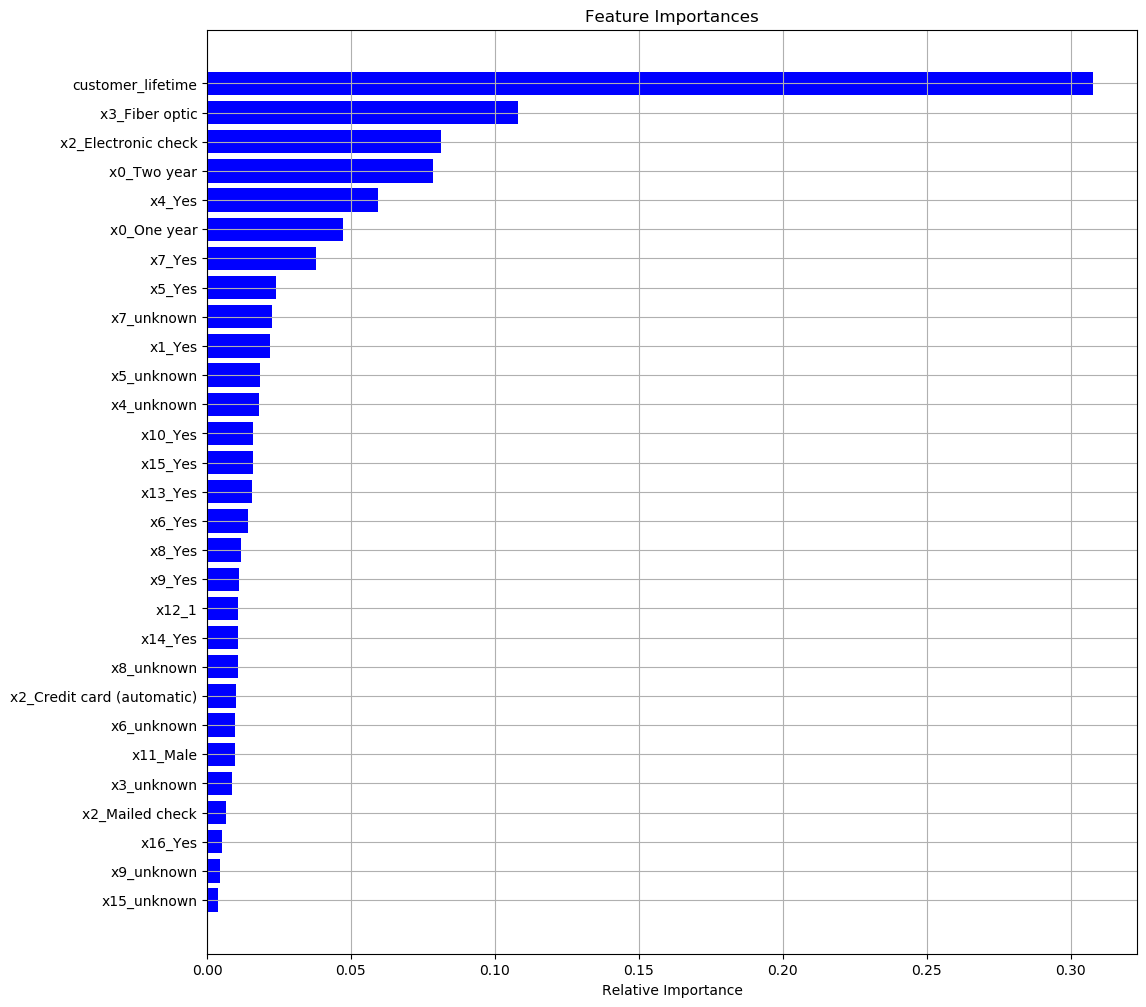

In [38]:
# # # выводим на экран важные признаки модели по замечанию код-ревьюера
features = list_features
importances = RFC_model_default.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *AUC-ROC* не менее 0.85
- [x]  Исследована метрика *Accuracy*